<a href="https://colab.research.google.com/github/VictorrLiu/Draft_notebooks/blob/main/Xenium_Workshop_Part1_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: 10x Genomics does not provide support for community-developed tools and makes no guarantees regarding their function or performance. Please contact tool developers with any questions.*

# **Section 1. Install packages**

## **Section 1.a Install packages directly from R repositories. **

This takes very long time

**Not recommended in workshop**

It's recommended if you plan to run these analyses in your own computing system. It's always good to keep your packages always updated.

In [ ]:
install.packages("Seurat")
devtools::install_github('immunogenomics/presto')
install.packages("hdf5r")

Warning message in install.packages("Seurat"):
“installation of package ‘sitmo’ had non-zero exit status”


## **Section 1.b Install packages by directly downloading pre-installed packages from AWS s3 bucket - R **
Recommended in a workshop as it's faster.

In [ ]:
system("wget https://cf.10xgenomics.com/supp/xenium/analysis-workshop/R_library_v4-5.tar.gz")

# move all pre-installed R packages to default R folder path
system("tar -xzvf ./R_library_v4-5.tar.gz")
system(paste0("cp -r ./R_library_v4-5/* ", .libPaths()[1]))

# **Section 2. Download Xenium data**


Seurat team has developed functions to load and analyze one Xenium data. Users can simply use `LoadXenium` funciton to load all Xenium data.

**What do I need to prepare?**

You only need to provide the following four files


*   cell_feature_matrix/ (cell-level gene expression)
*   cell_boundaries.parquet (visualization of cell segmnetation)
*   cells.parquet (cell level information)
*   transcripts.parquet (transcript level information)


In [ ]:
system("wget https://cf.10xgenomics.com/supp/xenium/analysis-workshop/Xenium_prime_breast_small_data.tar.gz")
system("tar -xzvf ./Xenium_prime_breast_small_data.tar.gz")
system("mv Xenium_prime_breast_small_data Xenium_Prime_Breast_Cancer_FFPE_outs")

# **Section 3. Load Xenium data**

**Task 1** - Loading required R packages

Here we the following packages:


*   Seurat
*   sf
*   ggplot2



In [ ]:
ADD_YOUR_CODE_HERE

**Task 2** - Load Xenium data

We can directly use `LoadXenium` to load whole Xenium data

*   segmentations. "cell" - load cell segmentation; "nucleus" - load nucleus segmentation; "NULL" - nothing
*   flip.xy. Flip x,y coordinates to match what's shown in Xenium Explorer



In [ ]:
# directory "Xenium_Prime_Breast_Cancer_FFPE_outs" contains those 3 required files and 1 folder
xenium.obj <- ADD_YOUR_CODE_HERE

In [ ]:
xenium.obj

An object of class Seurat 
6181 features across 39848 samples within 5 assays 
Active assay: Xenium (5101 features, 0 variable features)
 1 layer present: counts
 4 other assays present: BlankCodeword, ControlCodeword, ControlProbe, GenomicControl
 1 spatial field of view present: fov

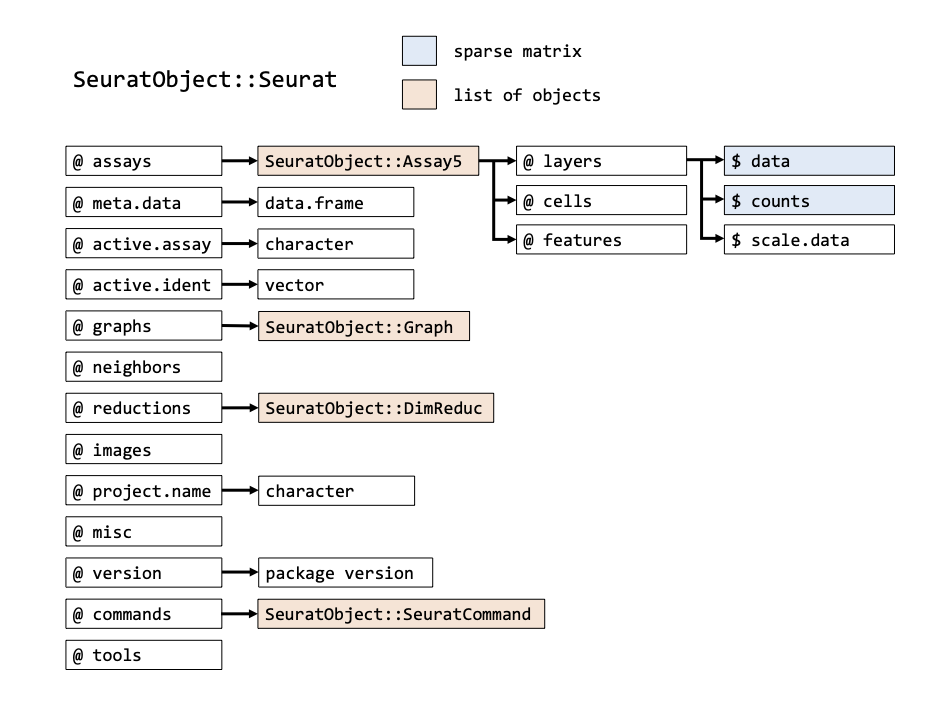


Image source: https://sib-swiss.github.io/single-cell-training/day1/day1-2_analysis_tools_qc.html

In [ ]:
metadata <- xenium.obj@meta.data
head(metadata, n=3)

,orig.ident,nCount_Xenium,nFeature_Xenium,segmentation_method,nCount_BlankCodeword,nFeature_BlankCodeword,nCount_ControlCodeword,nFeature_ControlCodeword,nCount_ControlProbe,nFeature_ControlProbe,nCount_GenomicControl,nFeature_GenomicControl
,<fct>,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
eaedgfpo-1,SeuratProject,84,77,Segmented by interior stain (18S),0,0,0,0,0,0,0,0
dchjbpll-1,SeuratProject,300,248,Segmented by interior stain (18S),0,0,0,0,0,0,0,0
dbndddjb-1,SeuratProject,27,24,Segmented by interior stain (18S),0,0,0,0,0,0,0,0


# **Section 4. Transcript plotting functions for Xenium**

**Task 3** - Plot total transcript per cell spatially

We can use `ImageFeaturePlot` this function -

 - features: nCount_Xenium
 - max.cutoff: q95 - *Color is saturated at 95th percentile (color is the same for >= 95th percential value)*


 If we want to see the same view as Xenium Explorer, we can add reverse y axis using `scale_y_reverse()`

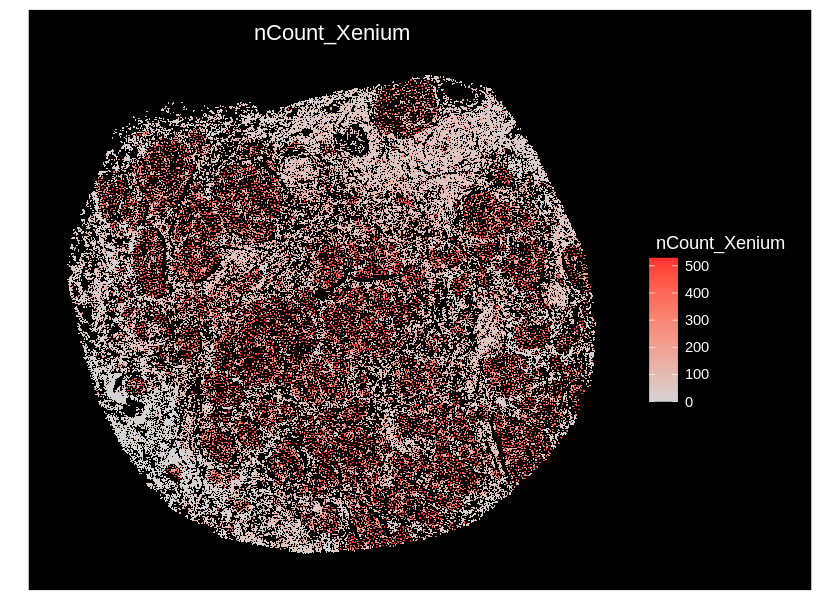

In [ ]:
# You can change "repr.plot.width" below to change plot width
# You can change "repr.plot.height" below to change plot height
options(repr.plot.width=7, repr.plot.height=5)

ADD_YOUR_CODE_HERE

**Task 4** - Plot ERBB2 gene spatially

This time let's also change the color from black to white.

We can use ImageFeaturePlot this function -


 - features: ERBB2
 - max.cutoff: q95 - *Color is saturated at 95th percentile (color is the same for >= 95th percential value)*
 - cols: c("black", "white")


 If we want to see the same view as Xenium Explorer, we can add reverse y axis using `scale_y_reverse()`


Warning message:
“No layers found matching search pattern provided”
Warning message in FetchData.Assay5(object = object[[DefaultAssay(object = object)]], :
“data layer is not found and counts layer is used”


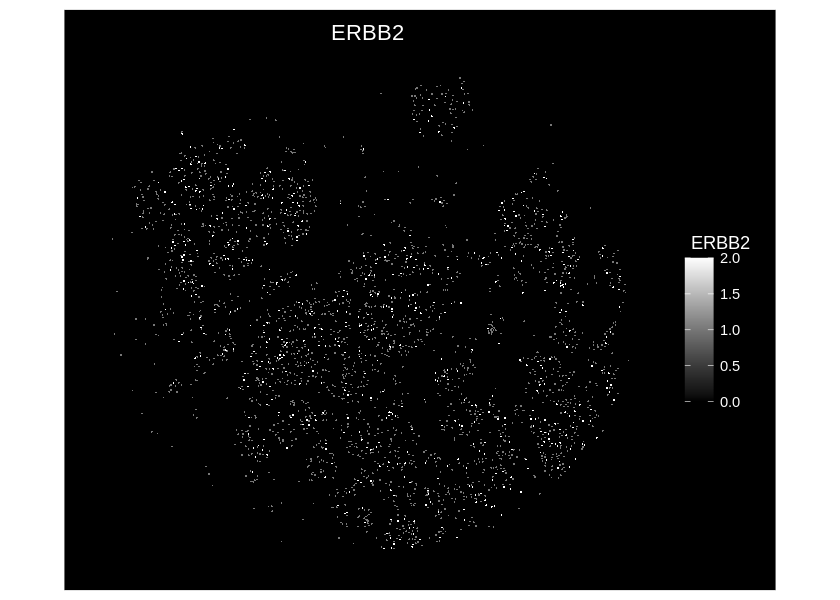

In [ ]:
# You can change "repr.plot.width" below to change plot width
# You can change "repr.plot.height" below to change plot height
options(repr.plot.width=7, repr.plot.height=5)

ADD_YOUR_CODE_HERE

# **Section 5. Xenium data QC**

The first step is QC. We want to remove cells with low transcript counts. Here we plot distribution of transcript count per cell in a histogram plot and based on it decide lower cutoff in transcript counts (aiming to remove cells with low transcript counts). The determination of lower cutoff can be subjective. There is no gold-standard rule.  

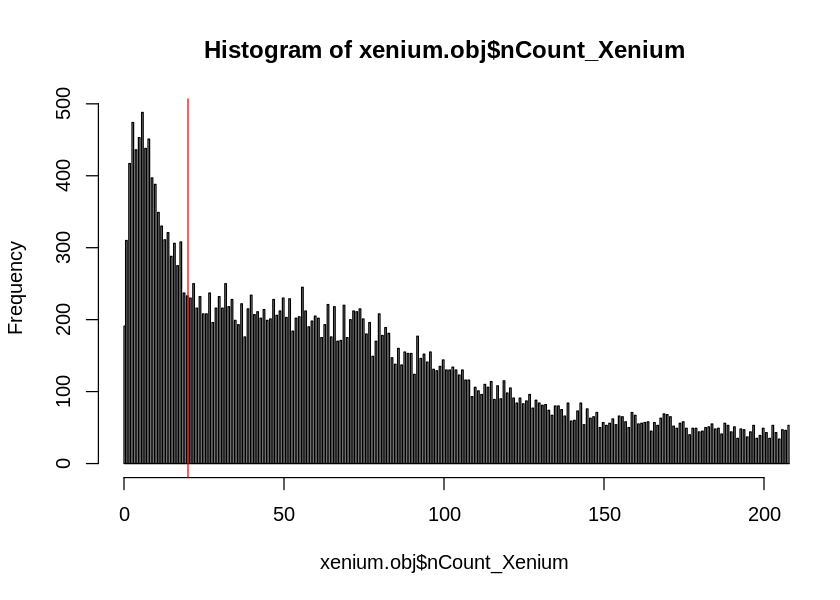

In [ ]:
# based on the histogram plot, here we choose 20 transcript counts as lower cutoff
hist(xenium.obj$nCount_Xenium, xlim=c(0,200), breaks = 5000)
abline(v = 20, col="red")

In [ ]:
## QC
## filtering cells based on detected transcripts per cell
## Upper limit cutoff - 98th percentile
## Lower limit cutoff - 20 determined by the previous plot

thres <- quantile(xenium.obj$nCount_Xenium, c(0.98))
xenium.obj <- subset(xenium.obj, subset = nCount_Xenium >= 20 & nCount_Xenium <= thres[1])

# **Section 6. Conventional analysis**

**Task 5** - Please run the following codes in the correct order.

There are 6 analysis codes but they are in the wrong order. Please based on what you learned in the workshop, run those 6 analysis codes in the correct order.

1. Clustering
2. PCA for dimensionality reduction
3. Data scaling
4. Normalization
5. 2D projection by UMAP
6. Find top 2k variable genes

In [ ]:
## Clustering
xenium.obj <- FindNeighbors(xenium.obj, dims = 1:30)
xenium.obj <- FindClusters(xenium.obj, resolution = .3, verbose=FALSE)

In [ ]:
## PCA for dimensionaity reduction
xenium.obj <- RunPCA(xenium.obj, verbose = FALSE)

In [ ]:
## Data scaling
xenium.obj <- ScaleData(xenium.obj)

In [ ]:
## Normalization
## library size based normalization, scale factor - median transcript count
xenium.obj <- NormalizeData(xenium.obj, scale.factor=median(xenium.obj$nCount_Xenium))

In [ ]:
## 2D projection by UMAP
xenium.obj <- RunUMAP(xenium.obj, dims = 1:30, verbose = FALSE)

In [ ]:
## Find top 2k variable genes
xenium.obj <- FindVariableFeatures(xenium.obj)

# **Section 7. Plot clustering and UMAP results**

**Task 6** - Plot clustering results in UMAP

We can use `DimPlot` to plot UMAP with clustering results.

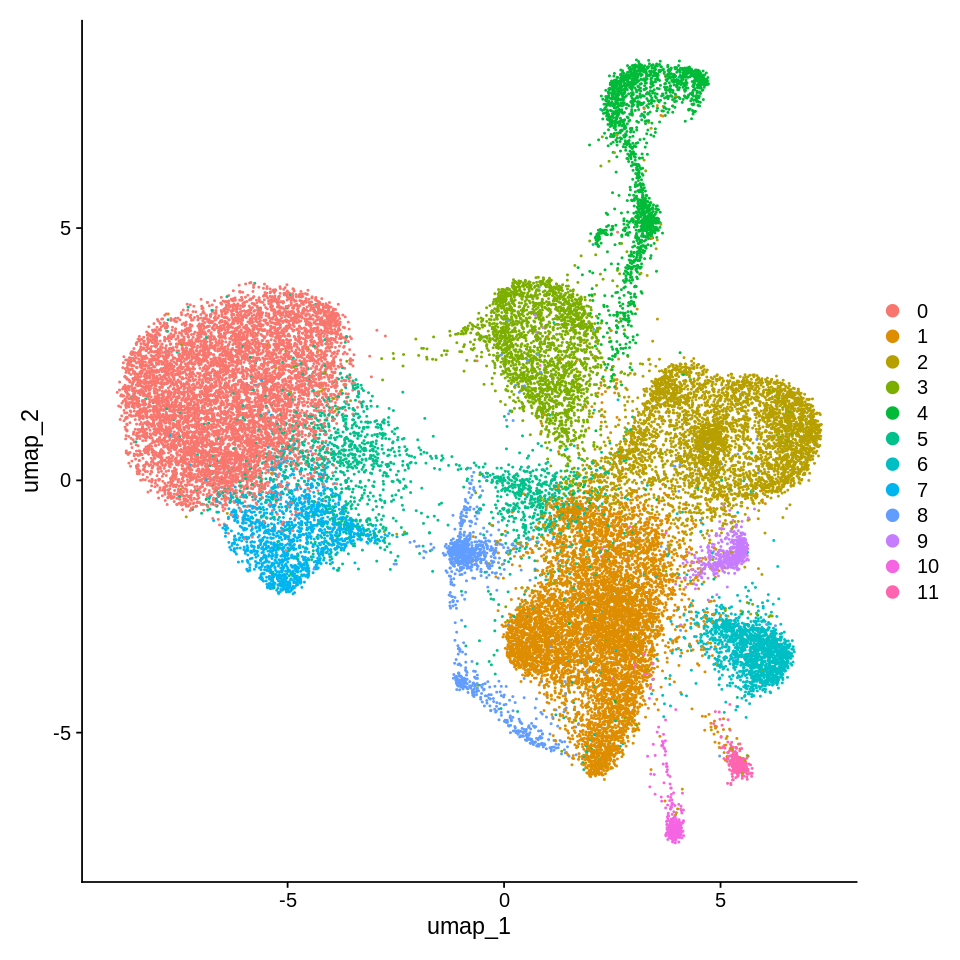

In [ ]:
## plot clustering results in UMAP

# You can change "repr.plot.width" below to change plot width
# You can change "repr.plot.height" below to change plot height
options(repr.plot.width=8, repr.plot.height=8)


ADD_YOUR_CODE_HERE

**Task 7** - Plot clustering results spatially in slide

We can use `ImageDimPlot`to plot clustering results spatially.

If we want to see the same view as Xenium Explorer, we can add reverse y axis using `scale_y_reverse()`.

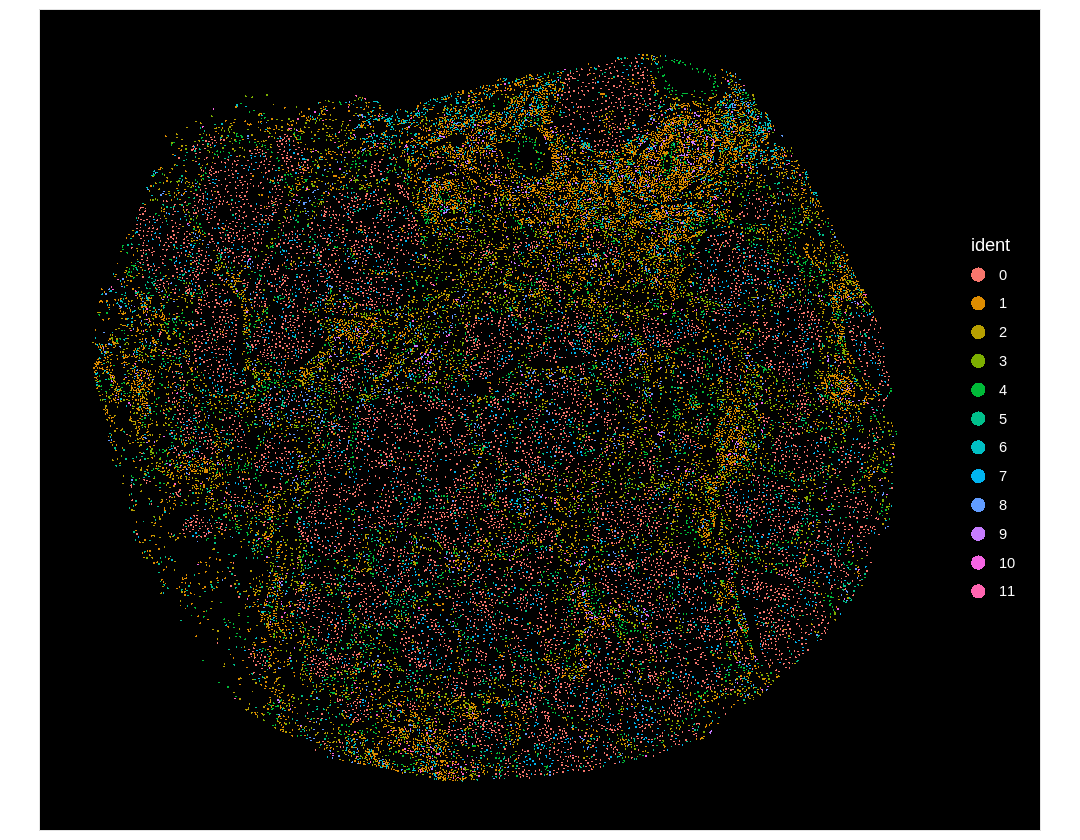

In [ ]:
## plot clustering results spatially in slide
options(repr.plot.width=9, repr.plot.height=7)

ADD_YOUR_CODE_HERE

# **Section 8. Export clustering results and visualize in Xenium Explorer**

Save clustering results in csv file and the csv file has two columns - `cell_id` and `group`. Below is one example:

```
cell_id,group
aaaaaohf-1,1
aaaafefl-1,1
aaaahjao-1,1
aaaajdej-1,1
```



In [ ]:
# generate a table with two columns - one for cell id and the other for group (clustering)
clustering_res <- FetchData(xenium.obj, vars = c("seurat_clusters"))
clustering_res$cell_id <- rownames(clustering_res)

clustering_res <- clustering_res[,c("cell_id","seurat_clusters")]
colnames(clustering_res) <- c("cell_id","group")

head(clustering_res, n = 3)

,cell_id,group
,<chr>,<fct>
eaedgfpo-1,eaedgfpo-1,6
dchjbpll-1,dchjbpll-1,0
dbndddjb-1,dbndddjb-1,5


In [ ]:
# save the table in csv file
write.table(clustering_res, "seurat_clustering_results.csv",
            col.names=TRUE, row.names=FALSE, quote=FALSE, sep=",")

Following the instructions below to import `seurat_clustering_results.csv` (exported seurat clusters in csv file) into Xenium Explorer

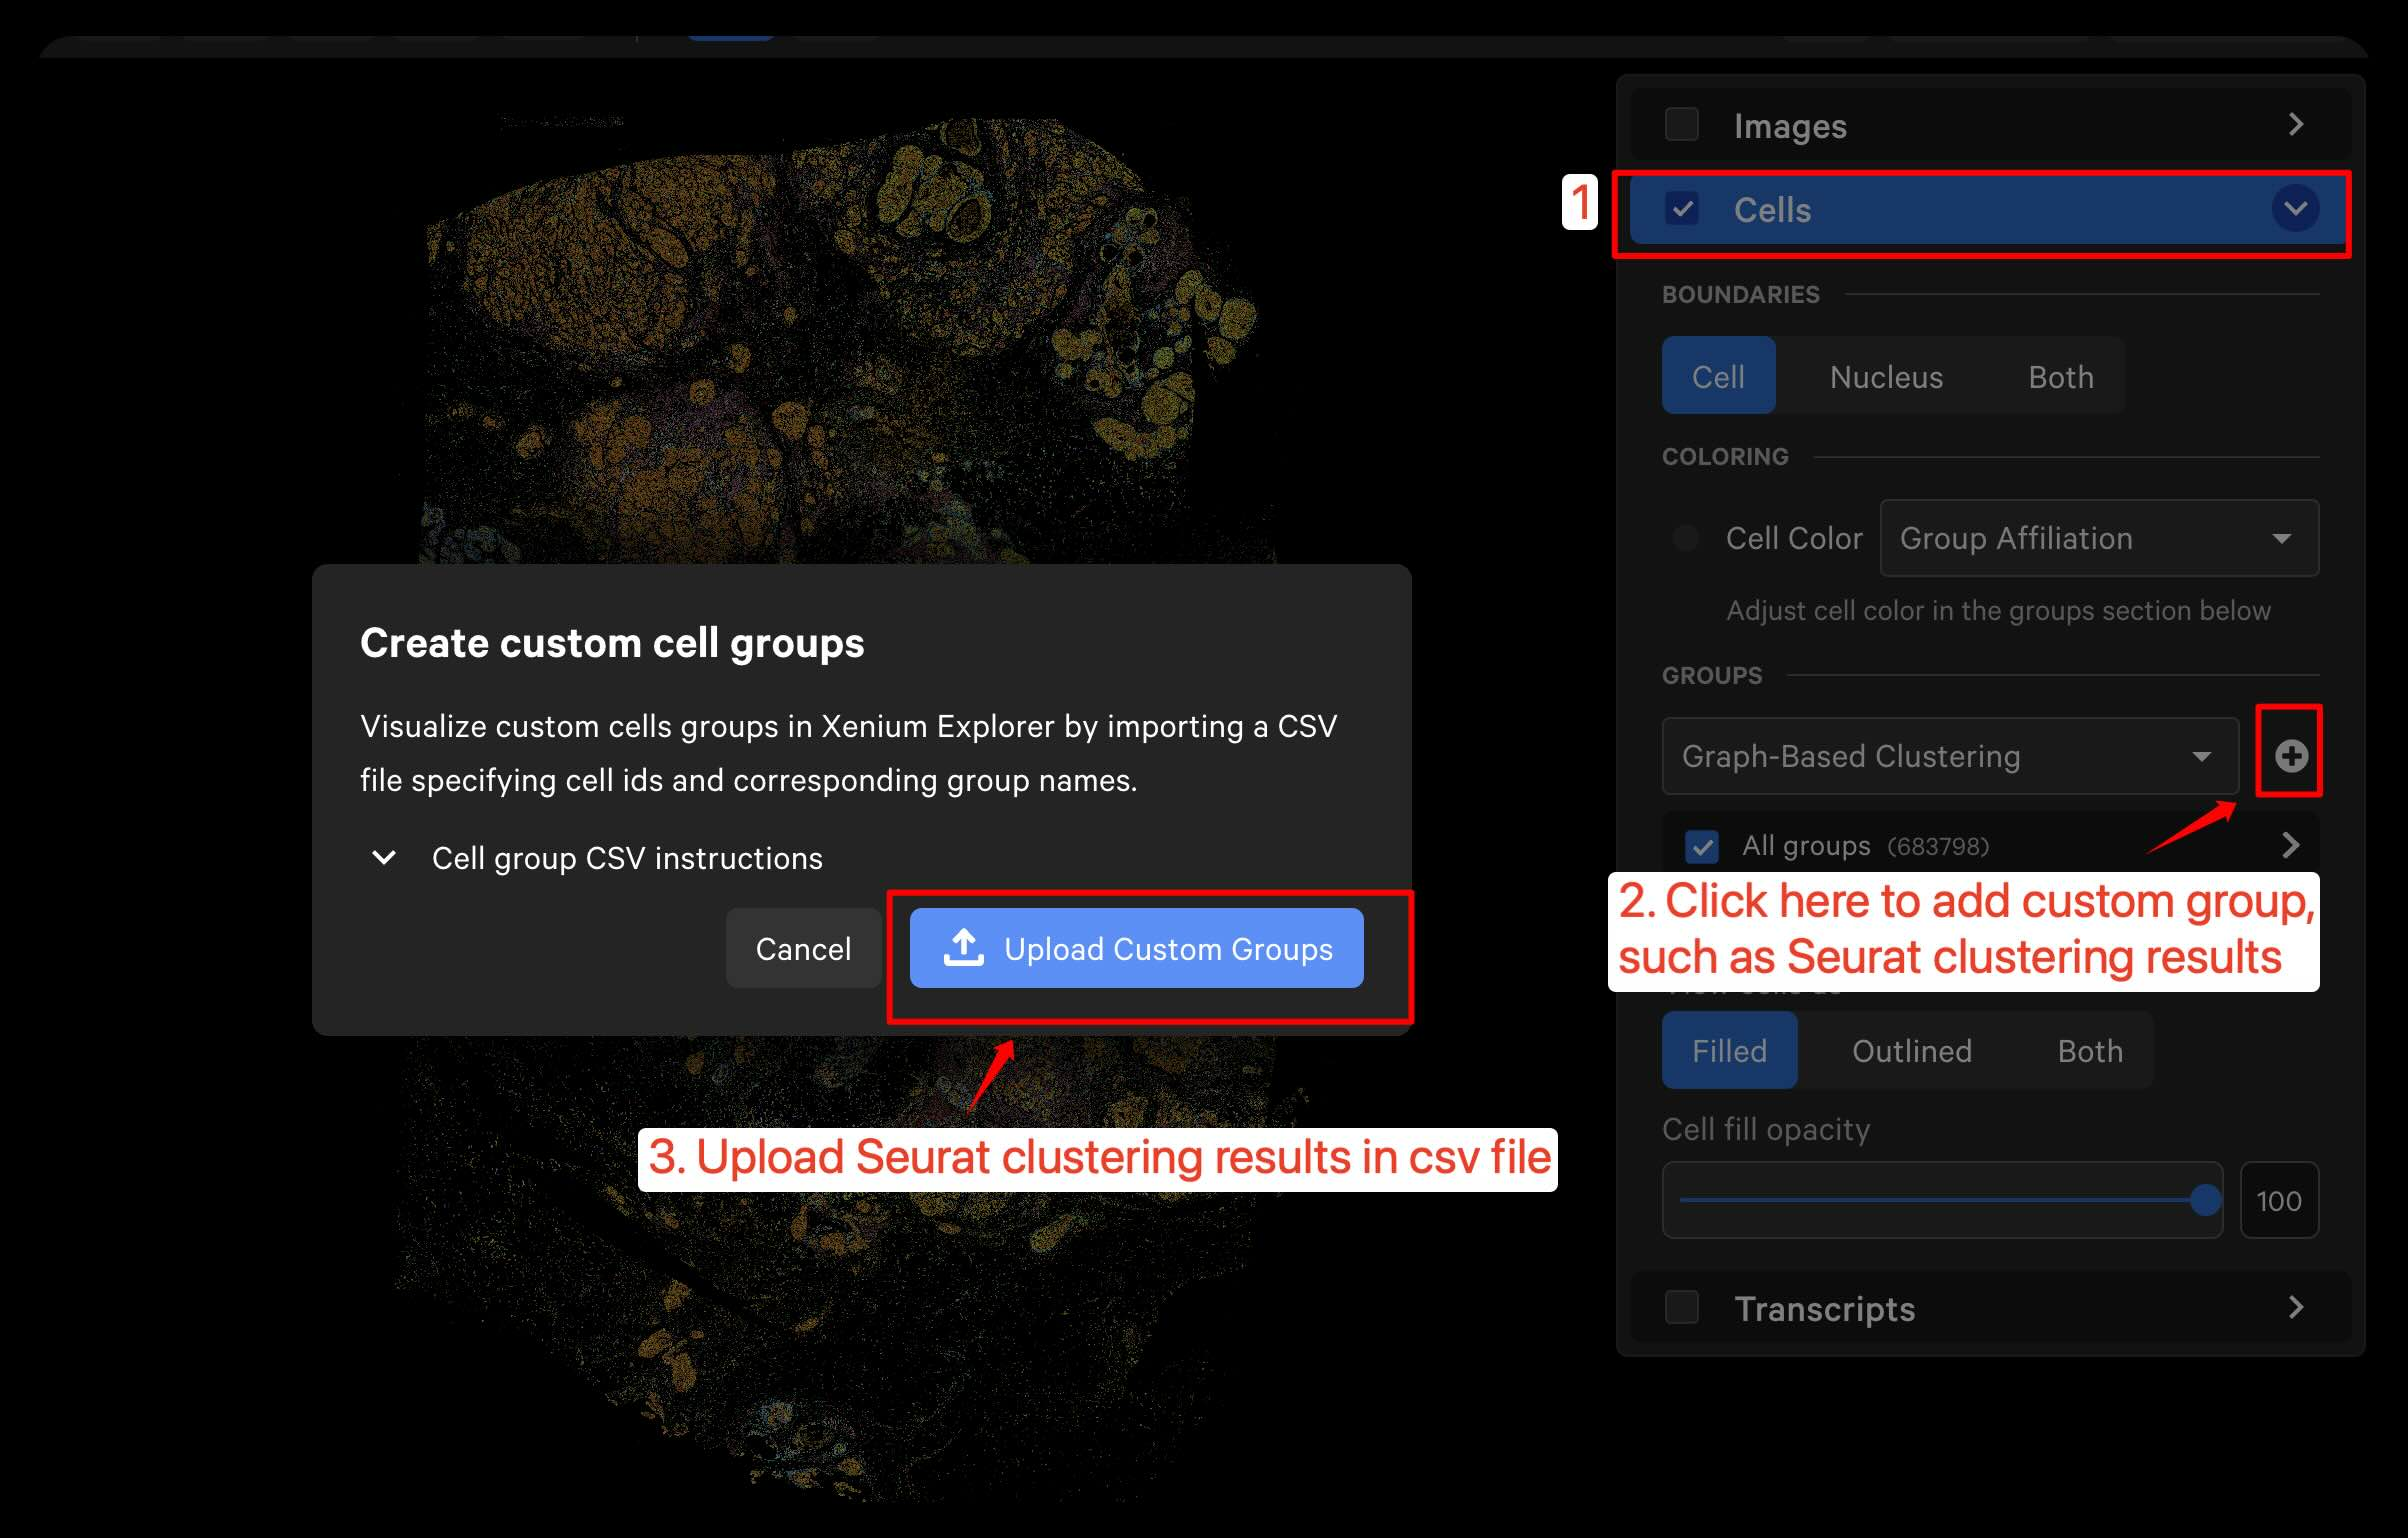

# **Section 9. Find marker genes for each cluster (for cell annotation)**

**Task 8** - Find marker genes for each clsuter

We can use Seurat's function `FindAllMarkers` to identify marker genes in each cluster.

- only.pos: TRUE - *only return positive markers*
- min.pct: 0.05 - *genes expressed in at least 5% of cells in either of the compared cell populations are tested*



In [ ]:
all.markers <- ADD_YOUR_CODE_HERE

In [ ]:
head(all.markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
RAB11FIP1,0,2.816425,0.890,0.112,0,0,RAB11FIP1
CA12,0,3.886819,0.817,0.041,0,0,CA12
XBP1,0,2.832167,0.896,0.123,0,0,XBP1
TSPAN13,0,3.424982,0.708,0.039,0,0,TSPAN13
CCND1,0,3.157389,0.642,0.038,0,0,CCND1
SLC9A3R1,0,2.783526,0.648,0.044,0,0,SLC9A3R1


In [ ]:
# save marker gene results in csv file
write.table(all.markers, "marker_genes_in_seurat_clusters.csv",
            col.names=TRUE, row.names=FALSE, quote=FALSE, sep=",")

Based on marker genes (`marker_genes_in_seurat_clusters.csv`) in each cluster, we can identify each cell type.

Here we are sharing one possible way to annotate each cluster.

Step 1. Get marker genes in each cluster.

Step 2. Find cell type that is highly associated with the provided marker genes via third-party tools, such as [Enrichr](https://maayanlab.cloud/Enrichr/).

Step 3. Check spatial location of that cluster in Xenium Explorer (together with HE image if any) and confirm its cell identity (some clusters' cell identities can be further supported by their spatial locations, such as tumor, vascular endothelial, ect).

**Making "endothelial" as an example below:**

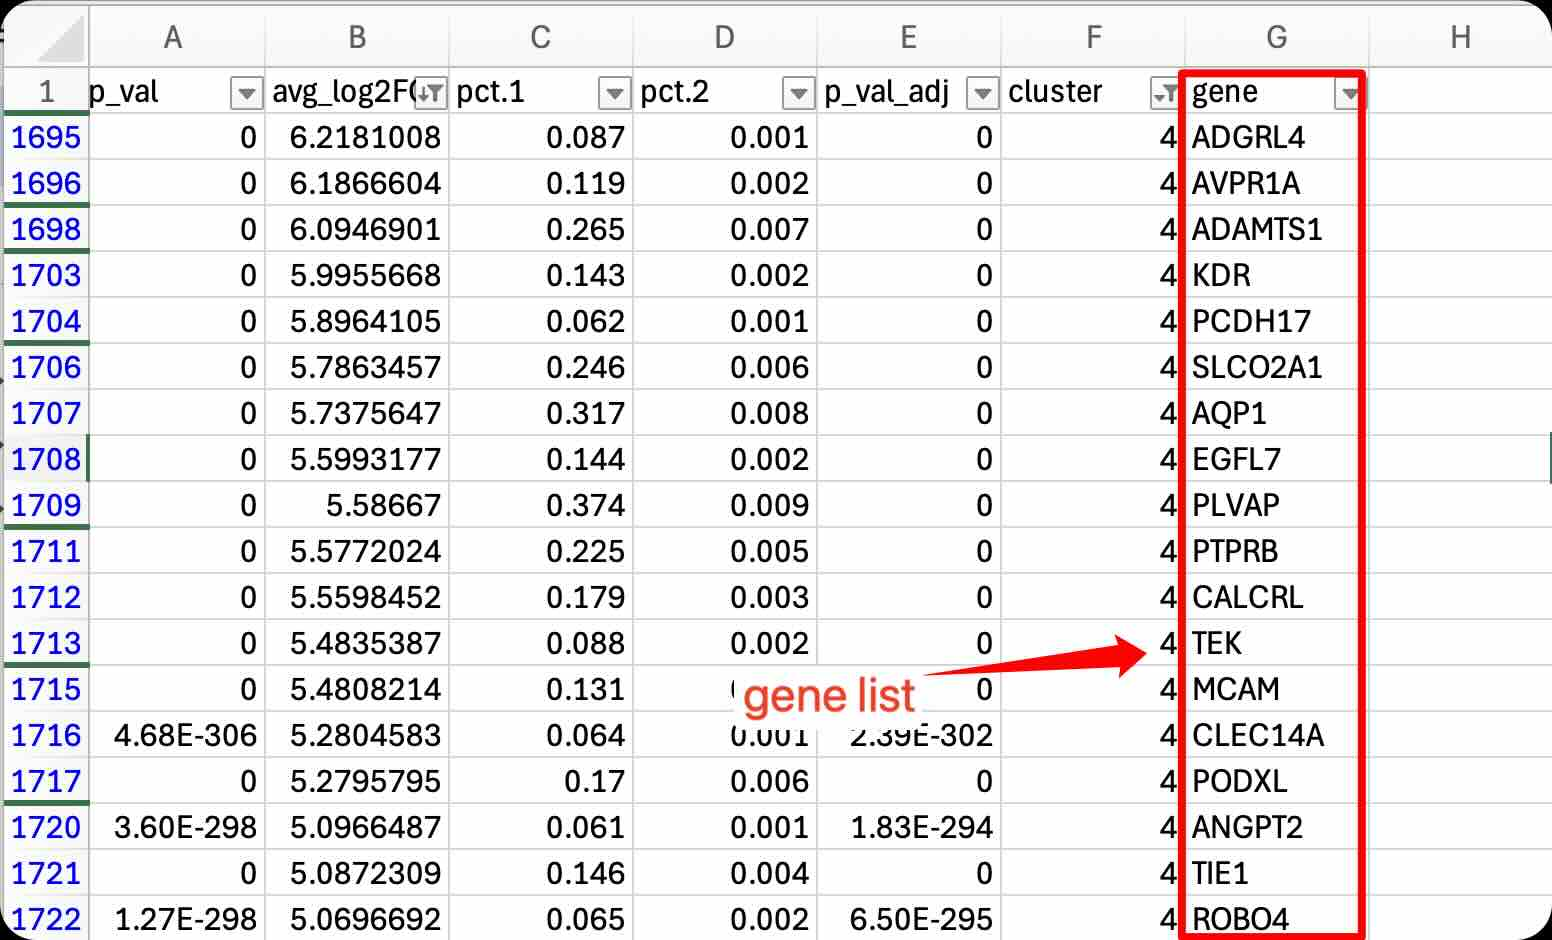

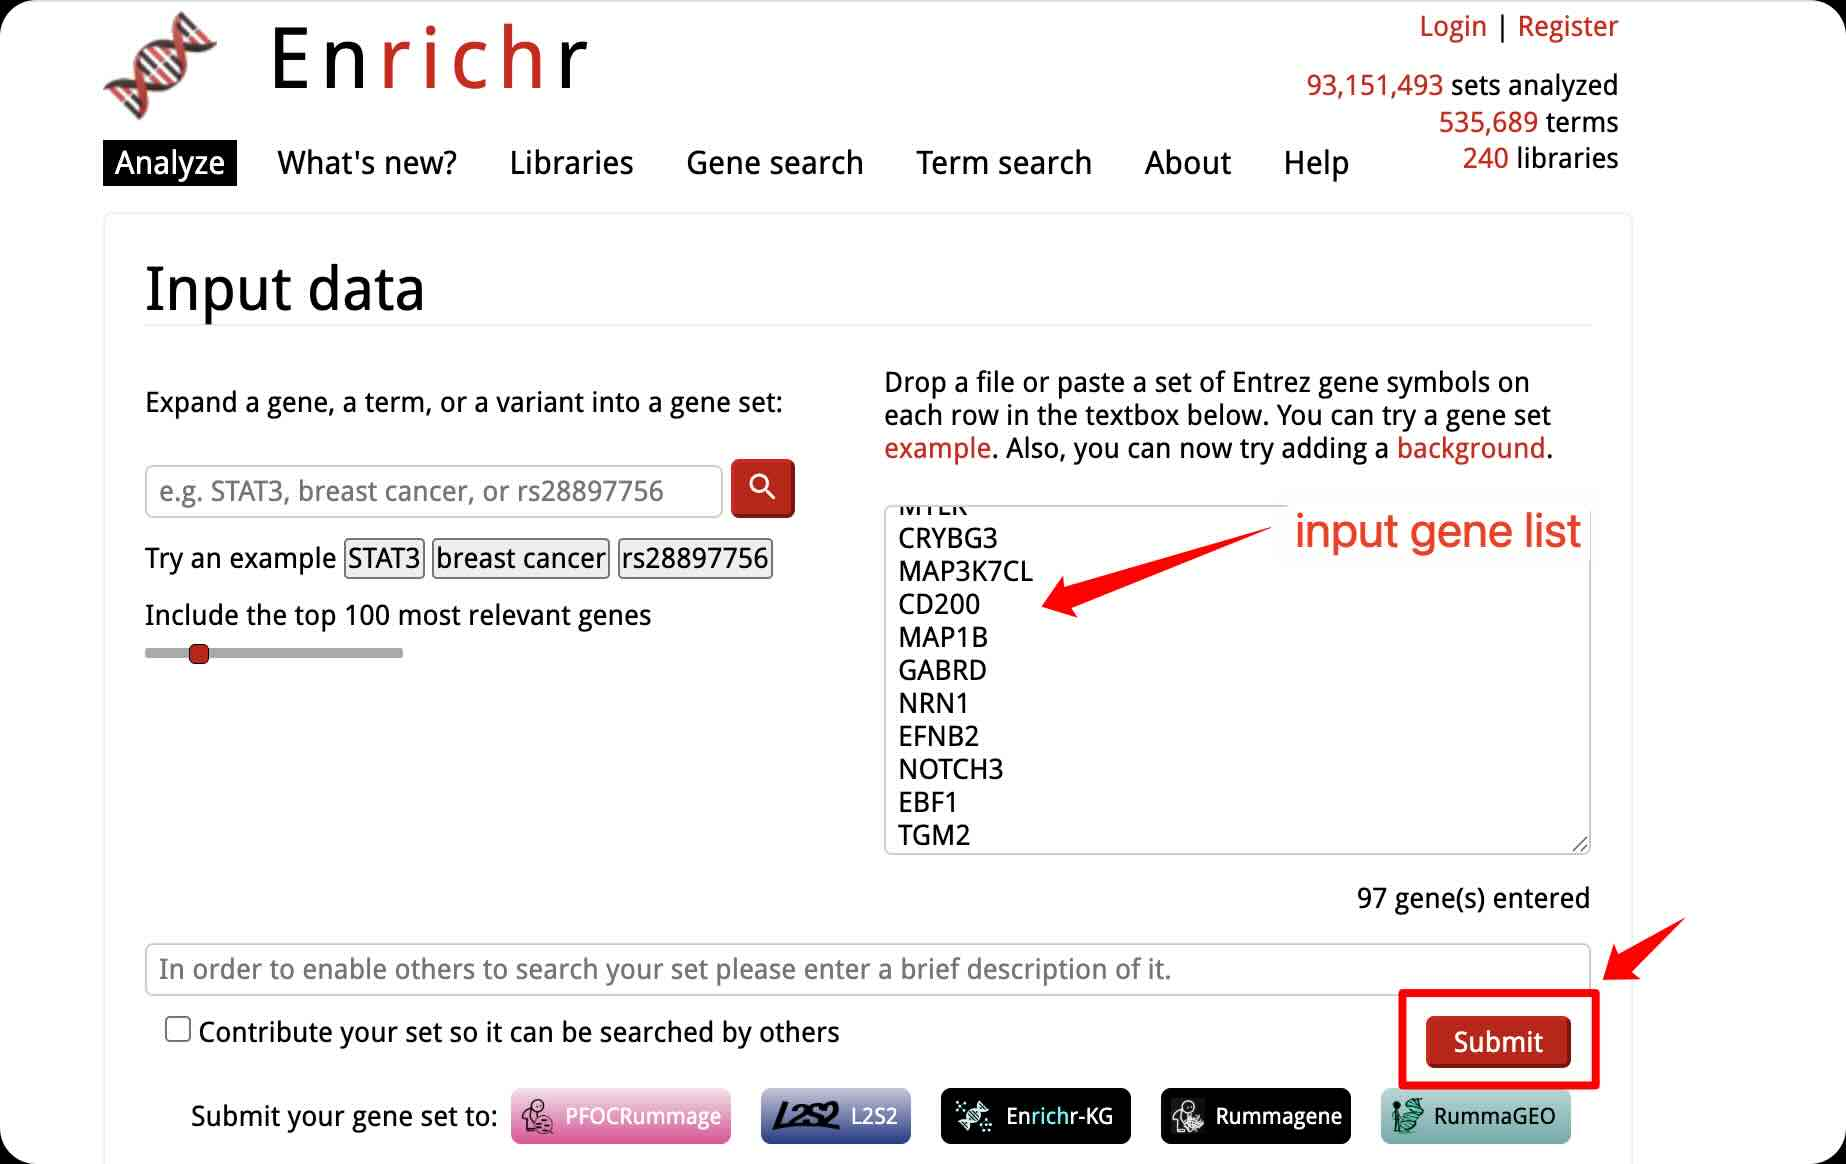

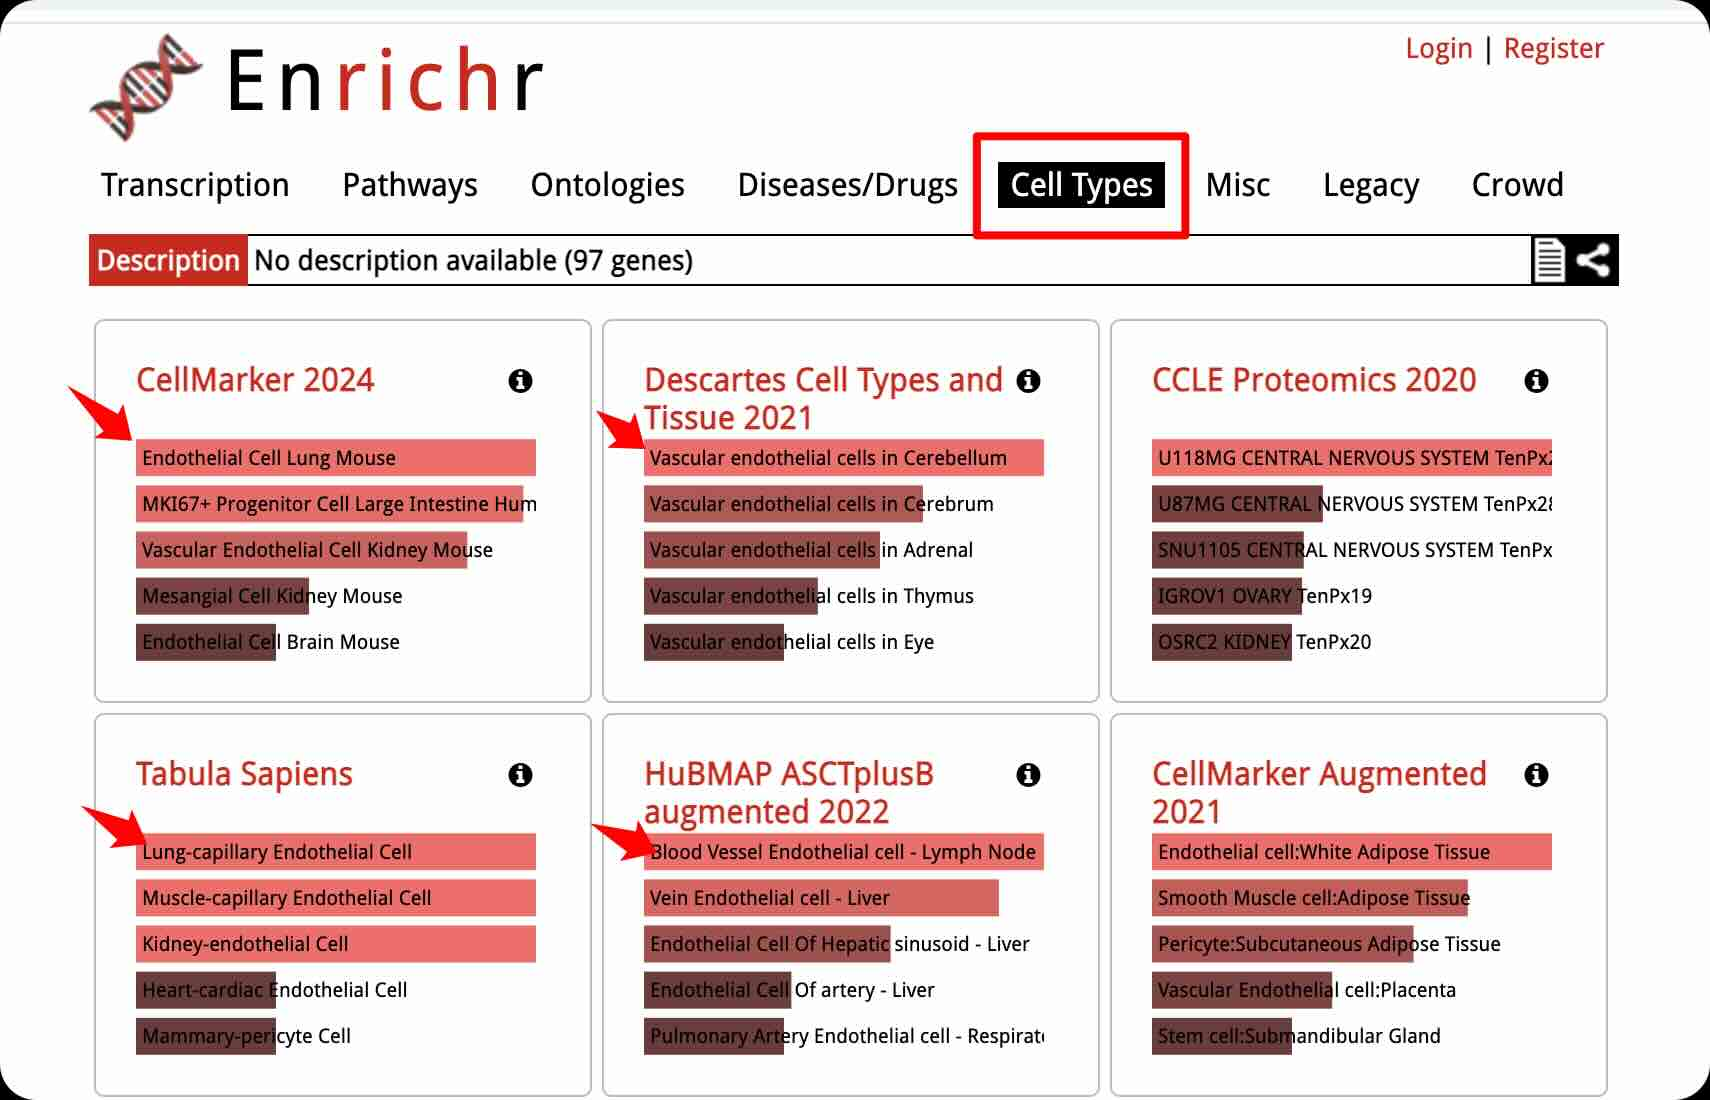

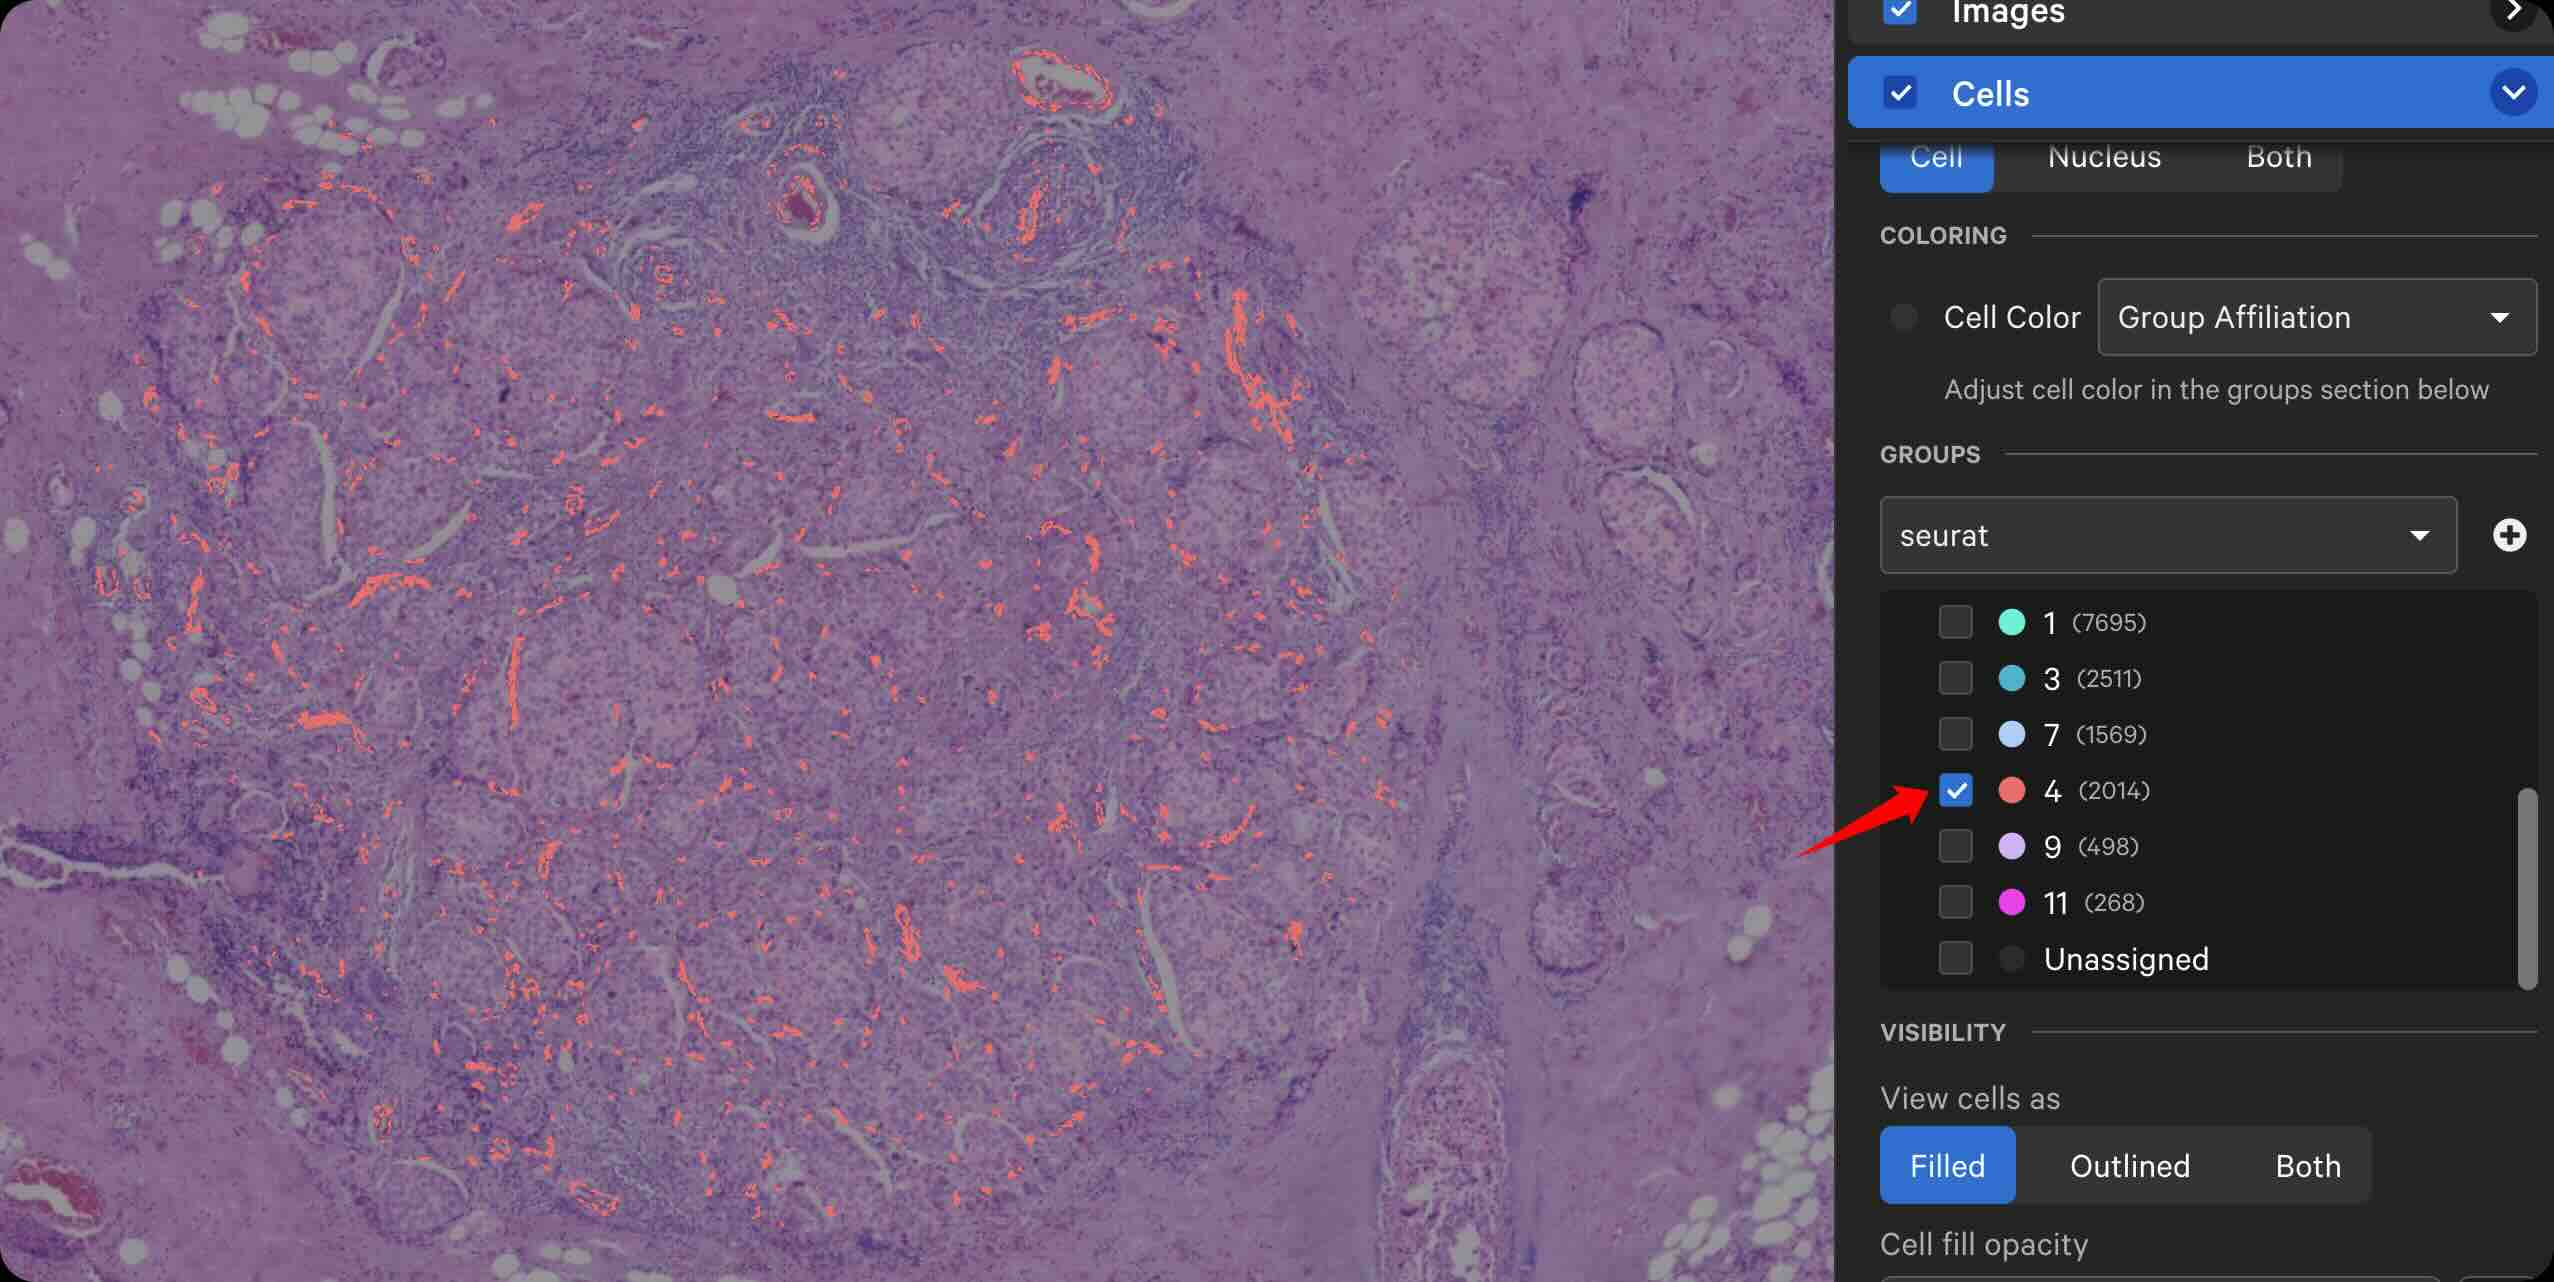

Based on the above idea, we can identify cluster 2 highly enriched with macrophage marker genes.

We can plot expression of macrophage marker gene, such as C1QC, across all clusters in a violin plot using Seurat's *VlnPlot* function. Indeed, C1QC is only highly expressed in cluster 2.

In [ ]:
options(repr.plot.width=12, repr.plot.height=5)
VlnPlot(xenium.obj, features = "C1QC", layer="data", pt.size=0)

# **Section 10. Cell annotation**

After following the above idea, we can annotate all clusters.

In [ ]:
### get clustering results and annotate each cluster
cluster <- FetchData(xenium.obj, vars = c("seurat_clusters"))
cluster$cell_id <- rownames(cluster)
head(cluster)

,seurat_clusters,cell_id
,<fct>,<chr>
eaedgfpo-1,6,eaedgfpo-1
dchjbpll-1,0,dchjbpll-1
dbndddjb-1,5,dbndddjb-1
dbgmjiie-1,2,dbgmjiie-1
damhbphh-1,10,damhbphh-1
damdjmod-1,8,damdjmod-1


In [ ]:
# annotate each cluster
cluster$cell_type <- NA
cluster[(cluster$seurat_clusters == 0), "cell_type"] <- "tumor"
cluster[(cluster$seurat_clusters == 1), "cell_type"] <- "T cells"
cluster[(cluster$seurat_clusters == 2), "cell_type"] <- "macrophage"
cluster[(cluster$seurat_clusters == 3), "cell_type"] <- "fibroblasts"
cluster[(cluster$seurat_clusters == 4), "cell_type"] <- "endothelial"
cluster[(cluster$seurat_clusters == 5), "cell_type"] <- "tumor"
cluster[(cluster$seurat_clusters == 6), "cell_type"] <- "B cells"
cluster[(cluster$seurat_clusters == 7), "cell_type"] <- "unknown"
cluster[(cluster$seurat_clusters == 8), "cell_type"] <- "plasma B"
cluster[(cluster$seurat_clusters == 9), "cell_type"] <- "dendritic cell"
cluster[(cluster$seurat_clusters == 10), "cell_type"] <- "mast cells"
cluster[(cluster$seurat_clusters == 11), "cell_type"] <- "pDC"
unique(cluster$cell_type)

Similar approach as Section 8, we can export cell annotation results (as `annotation_results.csv`) and import it in Xenium Explorer.

In [ ]:
cluster_ann <- cluster[,c("cell_id","cell_type")]
colnames(cluster_ann) <- c("cell_id","group")

In [ ]:
# save the table in csv file
write.table(cluster_ann, "annotation_results.csv",
            col.names=TRUE, row.names=FALSE, quote=FALSE, sep=",")

We can also save this cell annotation results in Xenium seurat object `xenium.obj`.

In [ ]:
xenium.obj$cell_type <- cluster$cell_type

plot UMAP with cell annotation results

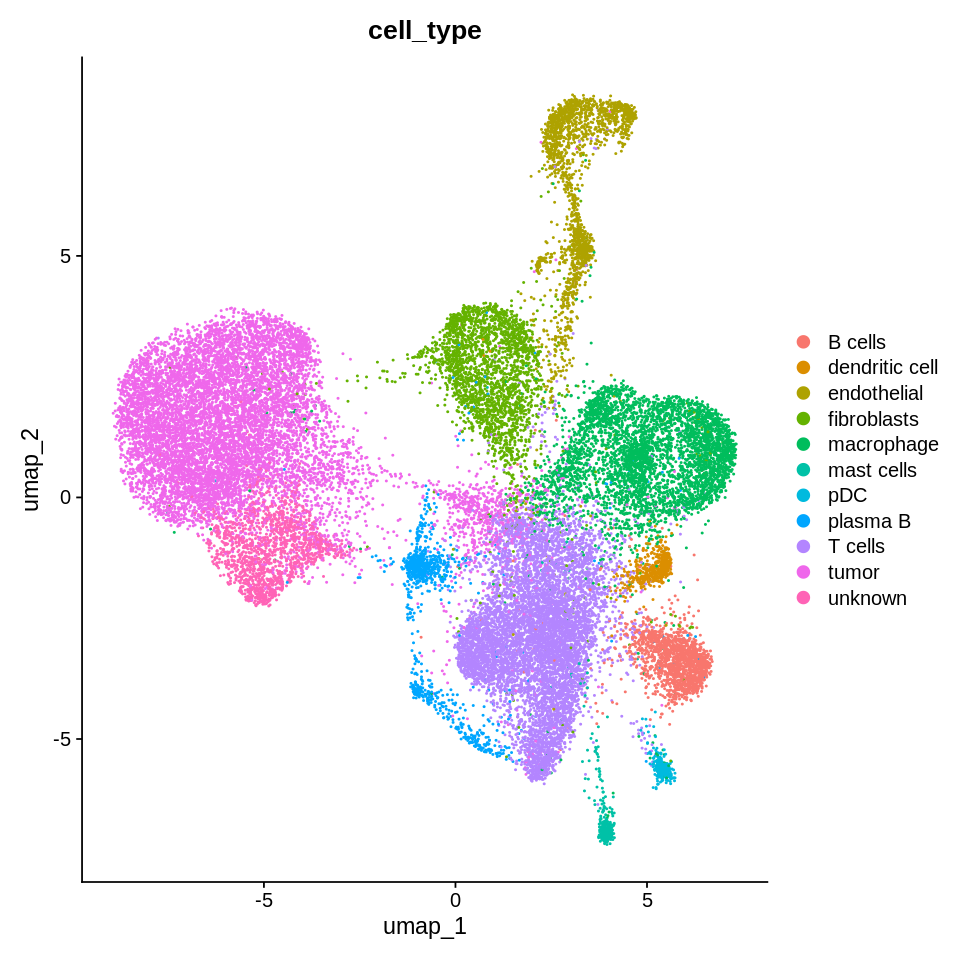

In [ ]:
## plot clustering results in UMAP
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(xenium.obj, group.by = "cell_type")

plot cell annotation results spatially

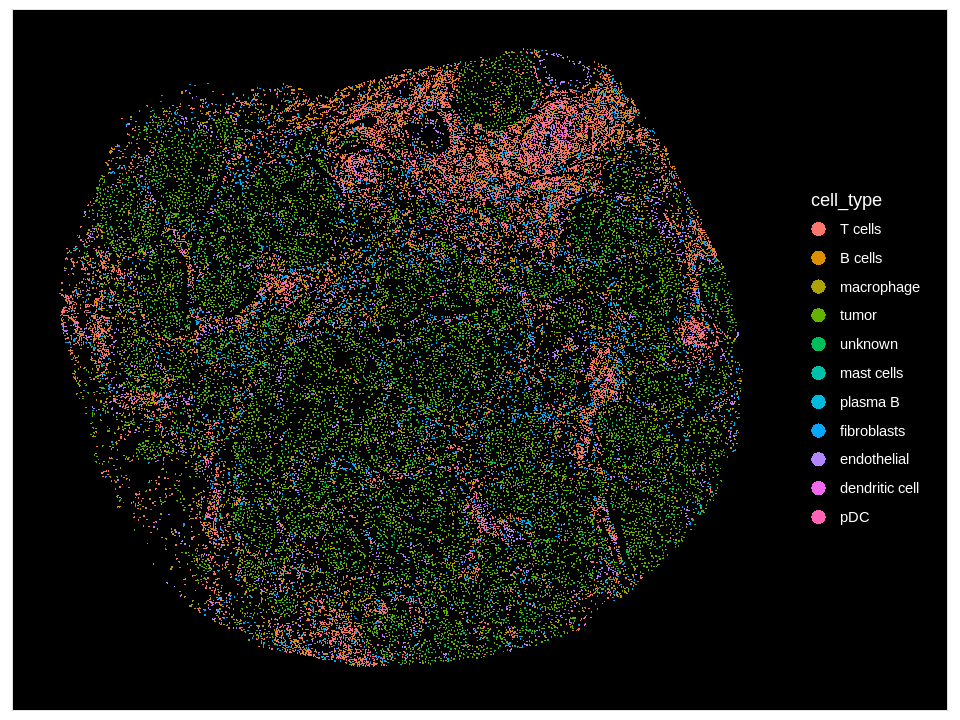

In [ ]:
## plot clustering results spatially in slide
options(repr.plot.width=8, repr.plot.height=6)
ImageDimPlot(xenium.obj, group.by = "cell_type")+
  scale_y_reverse()

# **Section 11. Save Xenium seurat object locally**

In [ ]:
saveRDS(xenium.obj,"Xenium_breast_subset_seurat.rds")